# **SUPERVISED_ML**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
cwd= os.getcwd() 
path = os.path.join(cwd,'data') 


In [411]:
X_train = pd.read_csv(os.path.join(cwd, 'data/train.csv'))
y_train = pd.read_csv(os.path.join(cwd, 'data/train.csv')).Survived

X_train = X_train[['Pclass','Sex','Age', 'Embarked']]

X_test = pd.read_csv(os.path.join(cwd, 'data/test.csv'))
y_test = pd.read_csv(os.path.join(cwd, 'data/gender_submission.csv')).Survived

X_test = X_test[['Pclass','Sex','Age', 'Embarked']]


In [412]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median(numeric_only=True))
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median(numeric_only=True))

X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode())
X_test['Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode())

In [413]:
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_test.shape)
print ('y_test.shape= ',y_test.shape)

X_train.shape=  (891, 4)
X_test.shape=  (418, 4)
y_train.shape=  (418,)
y_test.shape=  (418,)


In [414]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ["Sex", "Embarked"]

def label_encoder(X_train,X_test):    
    X_train = X_train.copy() 
    X_test = X_test.copy()

    for col in columns_to_encode:
        le = LabelEncoder().fit(X_train[col].astype(str)) 
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    return X_train,X_test

X_train,X_test= label_encoder(X_train,X_test)


In [415]:
from sklearn.model_selection import GridSearchCV

def run_GridSearchCV(clf,grid_values, X_train, y_train):
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
    print('Grid best score (f1): ', grid_clf.best_score_)
    return grid_clf.best_params_

In [416]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

def plot_model_performance(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f"{model_name} - Accuracy: {acc:.2%}, AUC: {auc:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Grid best parameter (max f1 ):  {'C': 0.1}
Grid best score (f1):  0.7158766126230727
train accuracy= 80.247%
test accuracy= 90.431%
LogisticRegression - Accuracy: 90.43%, AUC: 0.9752


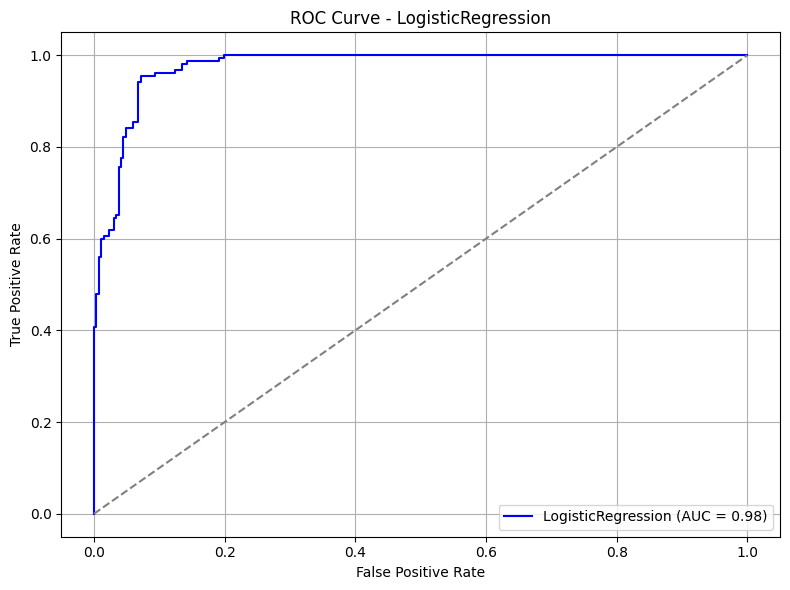

In [417]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

best_params_log_reg = run_GridSearchCV(log_reg, {'C': [0.005, 0.01,0.1, 1, 100, 10000]}, X_train, y_train)

log_reg.set_params(**best_params_log_reg)

log_reg.fit(X_train, y_train)

print("train accuracy= {:.3%}".format(log_reg.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(log_reg.score(X_test, y_test)))

plot_model_performance(log_reg, "LogisticRegression")

Grid best parameter (max f1 ):  {'criterion': 'entropy', 'max_depth': 5}
Grid best score (f1):  0.725191240437978
train accuracy= 83.838%
test accuracy= 88.038%
DecisionTreeClassifier - Accuracy: 88.28%, AUC: 0.8903


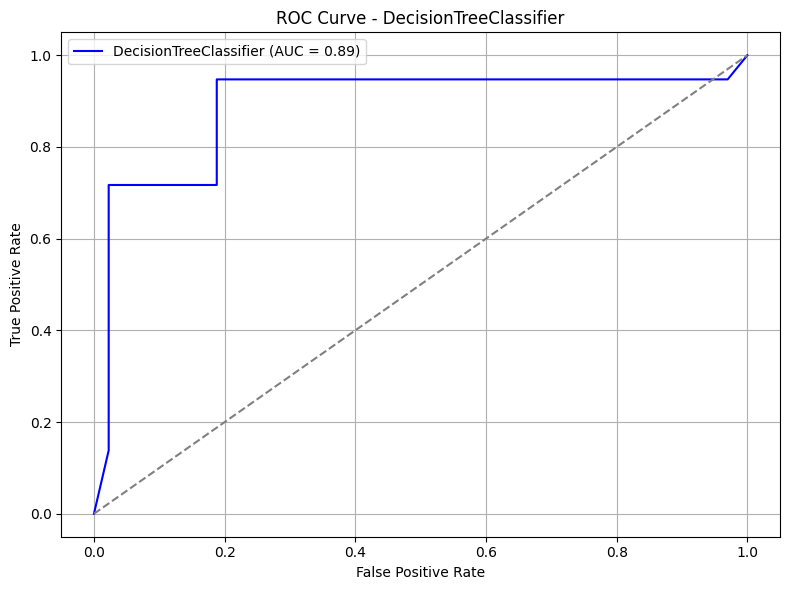

In [418]:
from sklearn.tree import DecisionTreeClassifier

des_tree = DecisionTreeClassifier()

best_params_des_tree = run_GridSearchCV(des_tree, {'max_depth': [2,5,7, 20, 50], 'criterion':['gini', 'entropy', 'log_loss']}, X_train, y_train)

des_tree.set_params(**best_params_des_tree)

des_tree.fit(X_train, y_train)

print("train accuracy= {:.3%}".format(des_tree.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(des_tree.score(X_test, y_test)))

plot_model_performance(des_tree, "DecisionTreeClassifier")

Grid best parameter (max f1 ):  {'criterion': 'entropy', 'n_estimators': 20}
Grid best score (f1):  0.7352851990115148
train accuracy= 89.899%
test accuracy= 78.230%
RandomForestClassifier - Accuracy: 79.19%, AUC: 0.8867


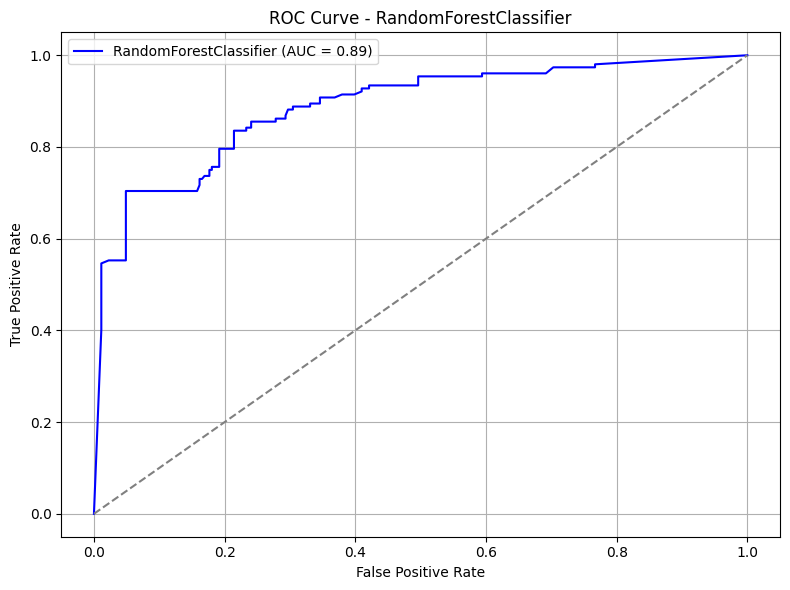

In [419]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()

best_params_rand_forest = run_GridSearchCV(rand_forest, {'n_estimators': [20,50,200,300], 'criterion':['gini', 'entropy', 'log_loss']}, X_train, y_train)

rand_forest.set_params(**best_params_rand_forest)

rand_forest.fit(X_train, y_train)

print("train accuracy= {:.3%}".format(rand_forest.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(rand_forest.score(X_test, y_test)))

plot_model_performance(rand_forest, "RandomForestClassifier")

train accuracy= 88.889%
test accuracy= 77.751%
XGBClassifier - Accuracy: 77.75%, AUC: 0.9018


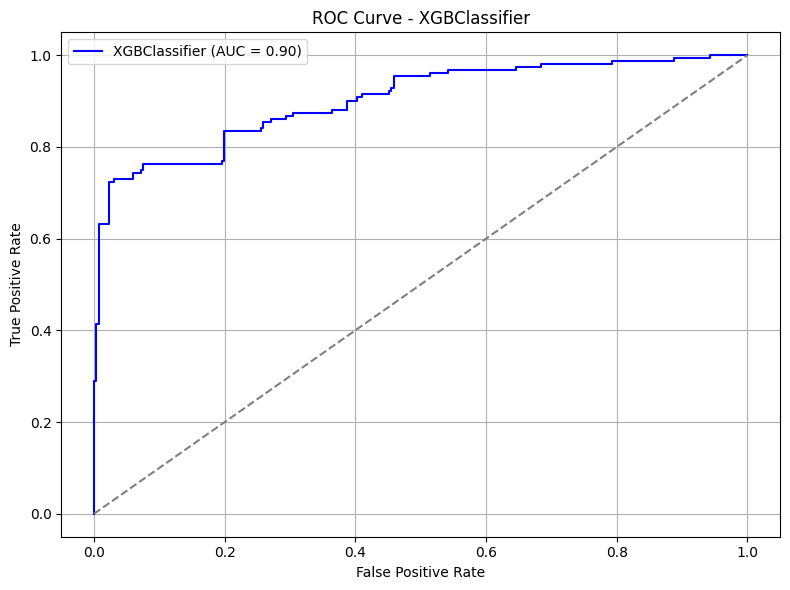

In [420]:
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier()

xgboost_clf.fit(X_train,y_train)

print("train accuracy= {:.3%}".format(xgboost_clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(xgboost_clf.score(X_test, y_test)))

plot_model_performance(xgboost_clf, "XGBClassifier")